In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
training_dataset = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")

In [3]:
training_dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
testing_dataset_original = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")

In [5]:
testing_dataset_original

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


**Exploratory Data Analysis (EDA)**

In [6]:
training_dataset.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
training_dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
training_dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
training_dataset.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [11]:
obj_columns = []
for x in training_dataset.dtypes.index:
    if training_dataset.dtypes[x] == 'object':
        obj_columns.append(x)
        

obj_columns.remove('Item_Identifier')
obj_columns.remove('Outlet_Identifier')

obj_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [12]:
for col in obj_columns:
    print(col)
    print(training_dataset[col].value_counts())
    print("="*40)

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


**Filling missing values present in our training dataset.**

In [13]:
item_weight_mean = training_dataset.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [14]:
missing_data = training_dataset['Item_Weight'].isnull()

for i, item in enumerate(training_dataset['Item_Identifier']):
    if missing_data[i]:
        if item in item_weight_mean:
            training_dataset['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            training_dataset['Item_Weight'][i] = np.mean(training_dataset['Item_Weight'])

In [15]:
training_dataset['Item_Weight'].isnull().sum()


0

In [16]:
outlet_size_mode = training_dataset.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [17]:
missing_val = training_dataset['Outlet_Size'].isnull()
training_dataset.loc[missing_val, 'Outlet_Size'] = training_dataset.loc[missing_val, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [18]:
training_dataset['Outlet_Size'].isnull().sum()

0

In [19]:
sum(training_dataset['Item_Visibility']==0)

526

In [20]:
training_dataset.loc[:, 'Item_Visibility'].replace([0], [training_dataset['Item_Visibility'].mean()], inplace=True)

In [21]:
sum(training_dataset['Item_Visibility']==0)

0

In [22]:
training_dataset['Item_Fat_Content'] = training_dataset['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
training_dataset['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**Adding more columns/categories from the existing one's**

In [23]:
training_dataset['New_Item_Type'] = training_dataset['Item_Identifier'].apply(lambda x: x[:2])
training_dataset['New_Item_Type'] = training_dataset['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
training_dataset['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [24]:
training_dataset.loc[training_dataset['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
training_dataset['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [25]:
training_dataset['Outlet_Years'] = 2013 - training_dataset['Outlet_Establishment_Year']
training_dataset['Outlet_Years'].head()

0    14
1     4
2    14
3    15
4    26
Name: Outlet_Years, dtype: int64

In [26]:
training_dataset = training_dataset.drop("Outlet_Establishment_Year", axis=1)
training_dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.930,Non-Edible,0.066132,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,Food,26
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,Small,Tier 2,Supermarket Type1,549.2850,Food,11
8520,NCJ29,10.600,Non-Edible,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,Non-Consumable,9
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,Food,4


In [27]:
training_dataset.skew()

Item_Weight          0.090561
Item_Visibility      1.286877
Item_MRP             0.127202
Item_Outlet_Sales    1.177531
Outlet_Years         0.396641
dtype: float64

**Visualization**


**Count Plots**

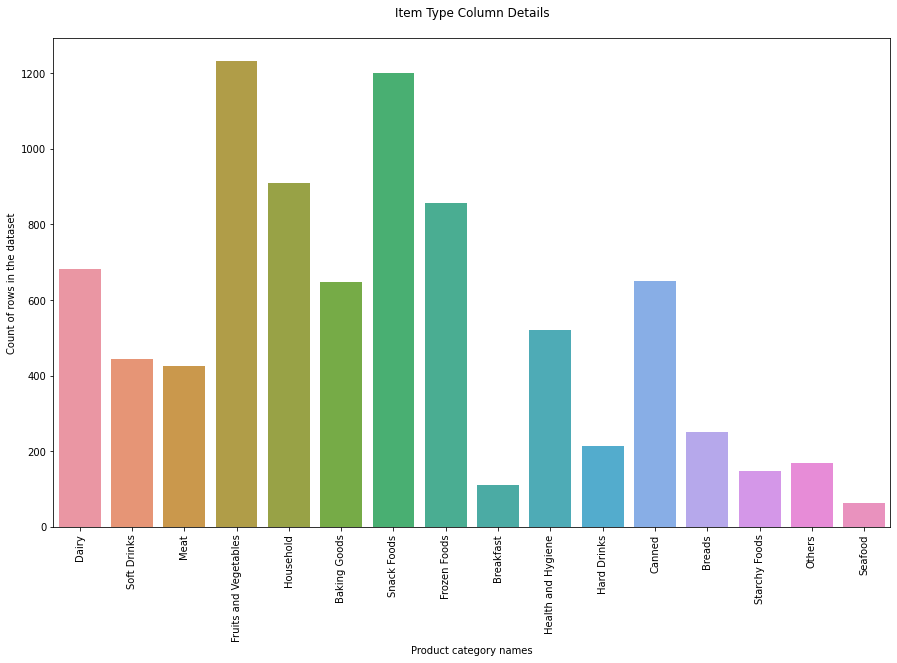

In [28]:
plt.figure(figsize=(15,9))
values = list(training_dataset['Item_Type'].unique())
diag = sns.countplot(training_dataset["Item_Type"])
diag.set_xticklabels(labels=values, rotation=90)
plt.title("Item Type Column Details\n")
plt.xlabel("Product category names")
plt.ylabel("Count of rows in the dataset")
plt.show()

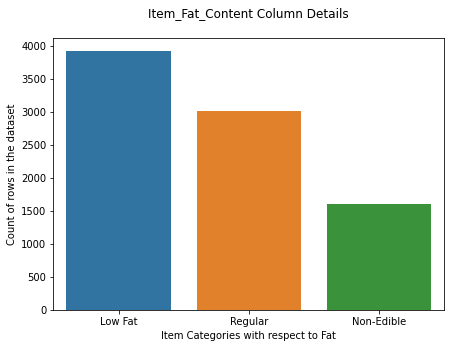

In [29]:
plt.figure(figsize=(7,5))
sns.countplot(training_dataset["Item_Fat_Content"])
plt.ylabel("Count of rows in the dataset")
plt.xlabel("Item Categories with respect to Fat")
plt.title("Item_Fat_Content Column Details\n")
plt.show()

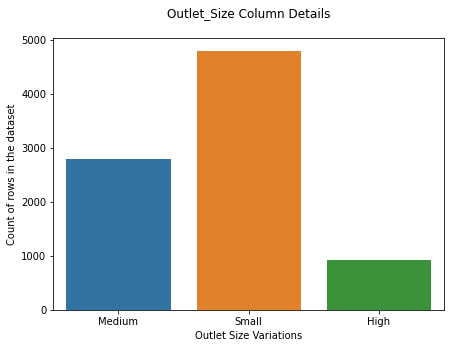

In [30]:
plt.figure(figsize=(7,5))
sns.countplot(training_dataset["Outlet_Size"])
plt.ylabel("Count of rows in the dataset")
plt.xlabel("Outlet Size Variations")
plt.title("Outlet_Size Column Details\n")
plt.show()

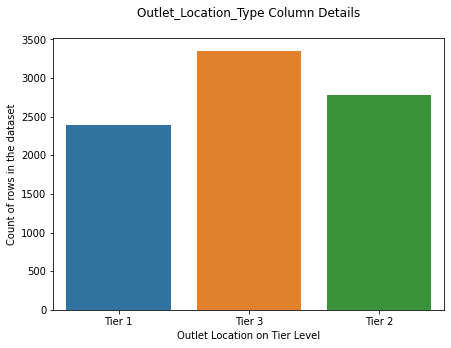

In [31]:
plt.figure(figsize=(7,5))
sns.countplot(training_dataset["Outlet_Location_Type"])
plt.ylabel("Count of rows in the dataset")
plt.xlabel("Outlet Location on Tier Level")
plt.title("Outlet_Location_Type Column Details\n")
plt.show()

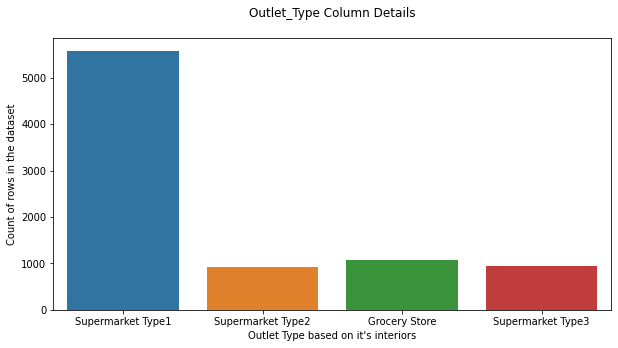

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(training_dataset["Outlet_Type"])
plt.ylabel("Count of rows in the dataset")
plt.xlabel("Outlet Type based on it's interiors")
plt.title("Outlet_Type Column Details\n")
plt.show()

**Pair Plot**

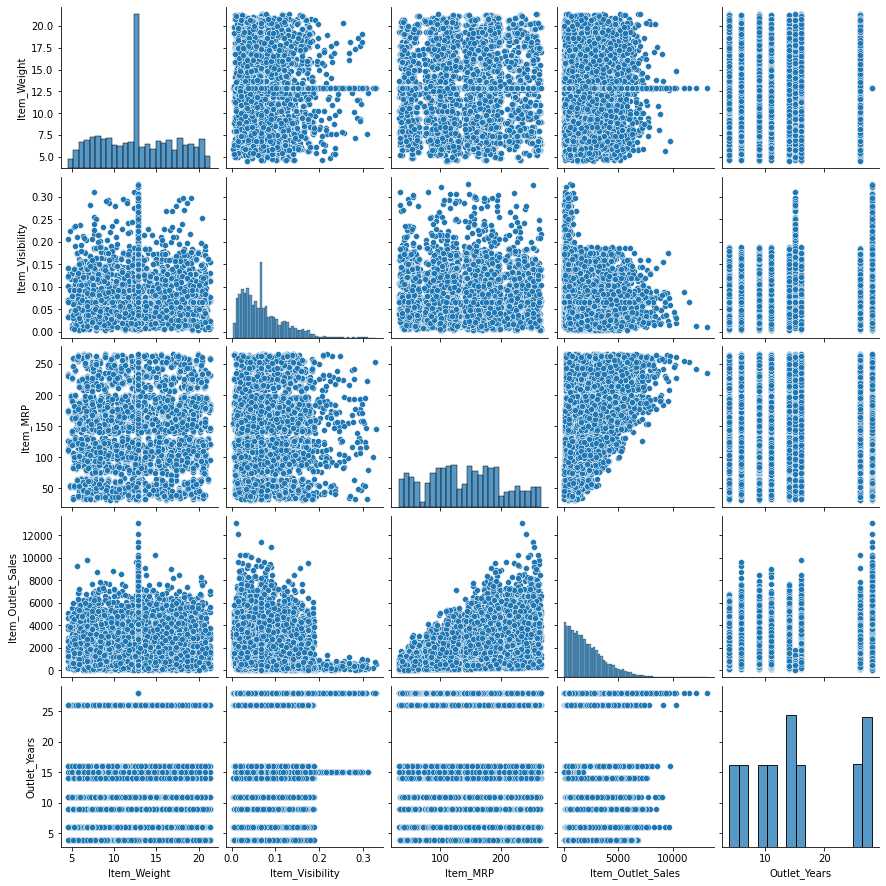

In [33]:
sns.pairplot(training_dataset)

**BoxPlot**

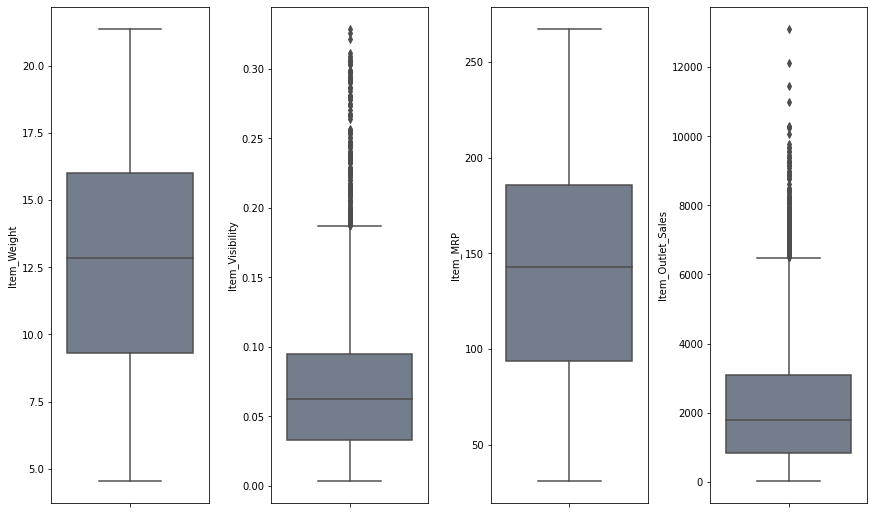

In [34]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(12,7))
index = 0
ax = ax.flatten()
numeric_column_names = ["Item_Weight", "Item_Visibility", "Item_MRP", "Item_Outlet_Sales"]
for col, value in training_dataset[numeric_column_names].items():
    sns.boxplot(y=col, data=training_dataset, ax=ax[index], palette="bone")
    index += 1
plt.tight_layout(pad=0.2, w_pad=0.9, h_pad=5.0)
plt.show()

**Distribution Plot**

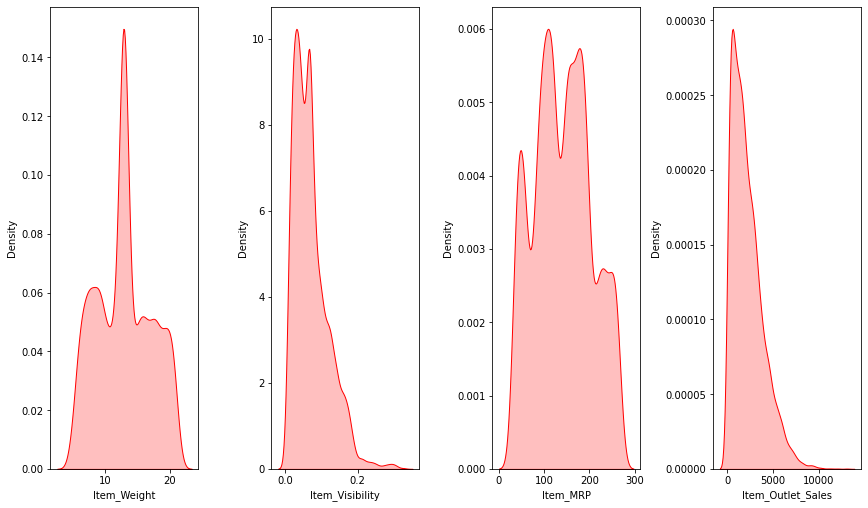

In [35]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(12,7))
index = 0
ax = ax.flatten()
numeric_column_names = ["Item_Weight", "Item_Visibility", "Item_MRP", "Item_Outlet_Sales"]
for col, value in training_dataset[numeric_column_names].items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

**Correlation using a Heatmap**

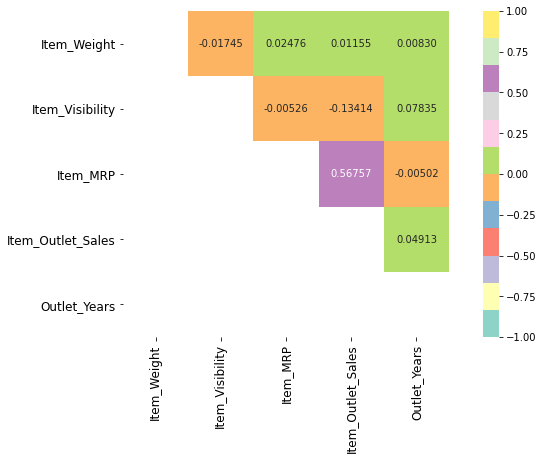

In [36]:
lower_triangle = np.tril(training_dataset.corr())
plt.figure(figsize=(12,6))
sns.heatmap(training_dataset.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.5f', 
            annot_kws={'size':10}, cmap="Set3", mask=lower_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Log Transformation on the Target Label column**

In [37]:
training_dataset['Item_Outlet_Sales'] = np.log(1+training_dataset['Item_Outlet_Sales'])

**Encoding**

In [38]:
training_dataset = training_dataset.drop(["Item_Identifier","Outlet_Identifier"], axis=1)

In [39]:
label_encoder = LabelEncoder()
col_name = ["Item_Type"]
for col in col_name:
    training_dataset[col] = label_encoder.fit_transform(training_dataset[col])

In [40]:
training_dataset = pd.get_dummies(training_dataset, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
training_dataset

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Size_High,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,9.300,0.016047,4,249.8092,8.225808,14,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.920,0.019278,14,48.2692,6.096776,4,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,17.500,0.016760,10,141.6180,7.648868,14,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.200,0.066132,6,182.0950,6.597664,15,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,8.930,0.066132,9,53.8614,6.903451,26,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,13,214.5218,7.929984,26,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
8519,8.380,0.046982,0,108.1570,6.310436,11,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
8520,10.600,0.035186,8,85.1224,7.085159,9,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
8521,7.210,0.145221,13,103.1332,7.521100,4,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


**Heatmap**

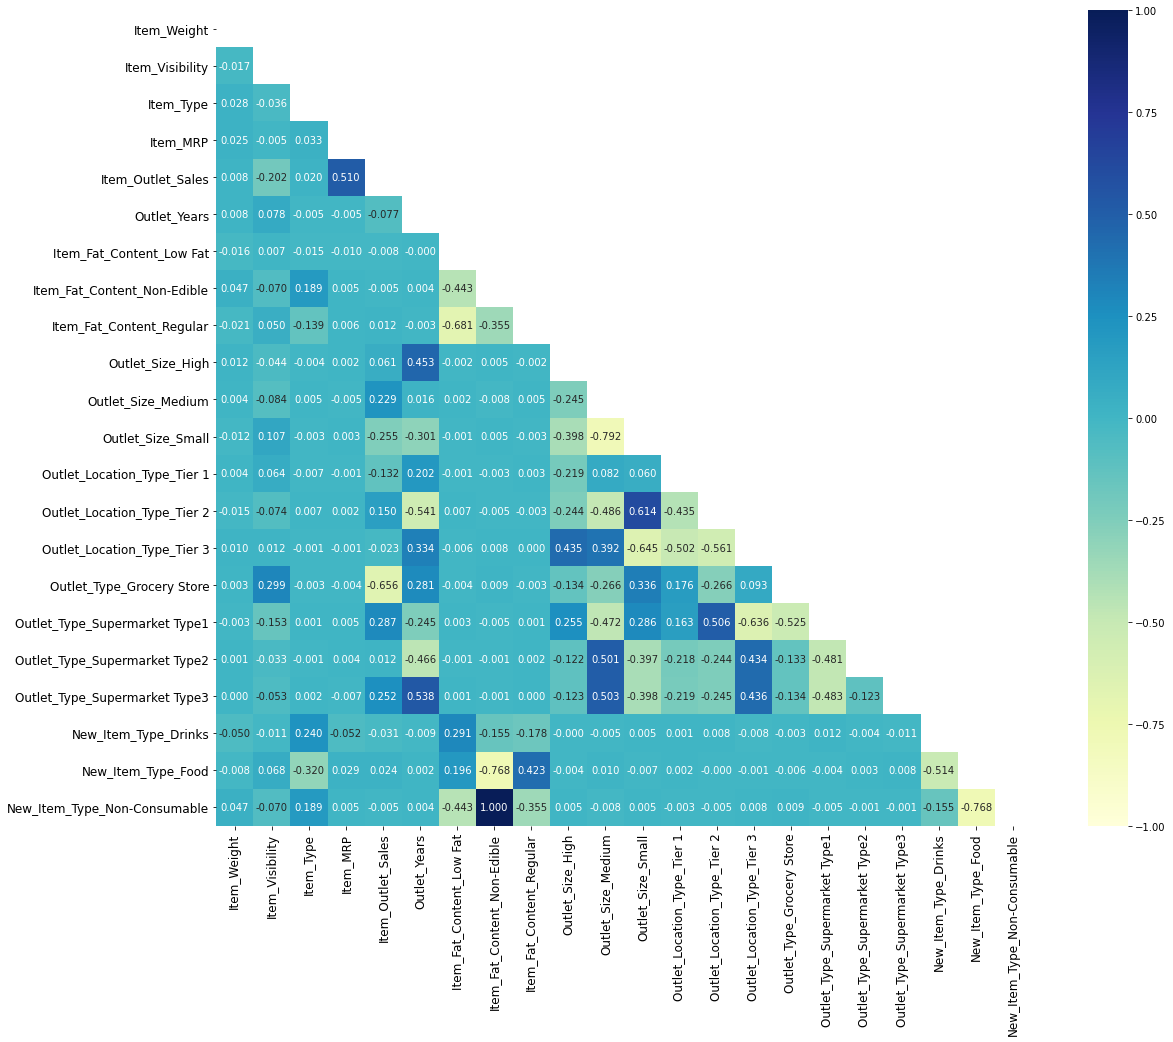

In [41]:
triangle = np.triu(training_dataset.corr())
plt.figure(figsize=(20,15))
sns.heatmap(training_dataset.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="YlGnBu", mask=triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label**

In [42]:
X = training_dataset.drop('Item_Outlet_Sales', axis=1)
Y = training_dataset['Item_Outlet_Sales']

**Feature Scaling**

In [43]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,-0.841872,-1.111358,-0.766479,1.747454,-0.139541,1.084133,-0.480558,-0.738147,-0.350395,1.432326,...,1.602840,-0.696678,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
1,-1.641706,-1.045067,1.608963,-1.489023,-1.334103,-0.922396,-0.480558,1.354743,-0.350395,1.432326,...,-0.623893,-0.696678,1.242650,-0.381529,-1.375891,2.860816,-0.351028,3.109193,-1.598190,-0.480558
2,1.098554,-1.096733,0.658786,0.010040,-0.139541,1.084133,-0.480558,-0.738147,-0.350395,1.432326,...,1.602840,-0.696678,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
3,1.500838,-0.083740,-0.291391,0.660050,-0.020085,-0.922396,-0.480558,1.354743,-0.350395,-0.698165,...,-0.623893,-0.696678,1.242650,2.621031,-1.375891,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
4,-0.929428,-0.083740,0.421242,-1.399220,1.293934,-0.922396,2.080915,-0.738147,2.853918,-0.698165,...,-0.623893,-0.696678,1.242650,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,-1.598190,2.080915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.418084,-0.275551,1.371418,1.180783,1.293934,1.084133,-0.480558,-0.738147,2.853918,-0.698165,...,-0.623893,-0.696678,1.242650,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
8519,-1.059578,-0.476643,-1.716656,-0.527301,-0.497909,-0.922396,-0.480558,1.354743,-0.350395,-0.698165,...,-0.623893,1.435383,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
8520,-0.534243,-0.718672,0.183698,-0.897208,-0.736822,-0.922396,2.080915,-0.738147,-0.350395,-0.698165,...,-0.623893,1.435383,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,-1.598190,2.080915
8521,-1.336444,1.538968,1.371418,-0.607977,-1.334103,-0.922396,-0.480558,1.354743,-0.350395,1.432326,...,-0.623893,-0.696678,1.242650,-0.381529,-1.375891,2.860816,-0.351028,-0.321627,0.625708,-0.480558


**Creating the training and testing data sets**

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=111)

**Machine Learning Model for Regression and Evaluation Metrics**

In [45]:
def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=111)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [46]:
model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 0.5408588930847752
R2 Score is: 72.15431077428075
Cross Validation Score: 71.85018109312118
R2 Score - Cross Validation Score is 0.30412968115956573


In [47]:
model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 0.5544770391523112
R2 Score is: 70.73441866806107
Cross Validation Score: 70.65717388607084
R2 Score - Cross Validation Score is 0.0772447819902311


In [48]:
model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 0.8818564219884686
R2 Score is: 25.973743837420248
Cross Validation Score: 24.812758604661823
R2 Score - Cross Validation Score is 1.1609852327584242


In [49]:
model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 0.7580167970667817
R2 Score is: 45.304993209546105
Cross Validation Score: 45.12345046118984
R2 Score - Cross Validation Score is 0.18154274835626438


In [50]:
KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 0.7438169774125529
R2 Score is: 47.33498703694181
Cross Validation Score: 45.65650933734674
R2 Score - Cross Validation Score is 1.6784776995950708


In [51]:
model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 0.7868974842317858
R2 Score is: 41.057800840989906
Cross Validation Score: 39.79657095243717
R2 Score - Cross Validation Score is 1.2612298885527338


In [52]:
model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 0.5836665264468277
R2 Score is: 67.57204244424545
Cross Validation Score: 67.17889606772816
R2 Score - Cross Validation Score is 0.39314637651729356


In [53]:
model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 0.5632329149230035
R2 Score is: 69.80284172364095
Cross Validation Score: 68.99082481794981
R2 Score - Cross Validation Score is 0.8120169056911379


**Hyper parameter tuning**

In [54]:
fmod_param = {'kernel' : ["linear", "rbf"],
              'gamma' : ["scale", "auto"],
              'C' : [2.0, 4.0],
              'epsilon' : [0.2, 0.4]
             }

In [55]:
GSCV = GridSearchCV(SVR(), fmod_param, cv=5)

In [56]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [2.0, 4.0], 'epsilon': [0.2, 0.4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [57]:
GSCV.best_params_

{'C': 2.0, 'epsilon': 0.4, 'gamma': 'auto', 'kernel': 'rbf'}

In [58]:
Final_Model = SVR(C=2.0, epsilon=0.4, gamma="auto", kernel="rbf")
Model_Training = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 72.70825420209222


**Pre processing the Testing Dataset to predict the Sales column**

In [59]:
testing_dataset = testing_dataset_original.copy()
testing_dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [60]:
item_weight_mean = testing_dataset.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
missing_data = testing_dataset['Item_Weight'].isnull()
for i, item in enumerate(testing_dataset['Item_Identifier']):
    if missing_data[i]:
        if item in item_weight_mean:
            testing_dataset['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            testing_dataset['Item_Weight'][i] = np.mean(testing_dataset['Item_Weight'])

outlet_size_mode = testing_dataset.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
missing_val = testing_dataset['Outlet_Size'].isnull()
testing_dataset.loc[missing_val, 'Outlet_Size'] = testing_dataset.loc[missing_val, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

testing_dataset.loc[:, 'Item_Visibility'].replace([0], [testing_dataset['Item_Visibility'].mean()], inplace=True)

In [61]:
testing_dataset['Item_Fat_Content'] = testing_dataset['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
testing_dataset['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [62]:
testing_dataset['New_Item_Type'] = testing_dataset['Item_Identifier'].apply(lambda x: x[:2])
testing_dataset['New_Item_Type'] = testing_dataset['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
testing_dataset['New_Item_Type'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: New_Item_Type, dtype: int64

In [63]:
testing_dataset.loc[testing_dataset['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
testing_dataset['Item_Fat_Content'].value_counts()

Low Fat       2581
Regular       2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64

In [64]:
testing_dataset['Outlet_Years'] = 2013 - testing_dataset['Outlet_Establishment_Year']
testing_dataset = testing_dataset.drop("Outlet_Establishment_Year", axis=1)

In [65]:
testing_dataset = testing_dataset.drop(["Item_Identifier","Outlet_Identifier"], axis=1)

In [66]:
label_encoder = LabelEncoder()
col_name = ["Item_Type"]
for col in col_name:
    testing_dataset[col] = label_encoder.fit_transform(testing_dataset[col])

# One Hot Encoder
testing_dataset = pd.get_dummies(testing_dataset, columns=['Item_Fat_Content','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])

In [67]:
scaler = StandardScaler()
testing_dataset = pd.DataFrame(scaler.fit_transform(testing_dataset), columns=testing_dataset.columns)

**Prediction Results**

In [68]:
Predicted_Sales = Final_Model.predict(testing_dataset)
Predicted_Sales = np.exp(Predicted_Sales)
Predicted_Sales

array([1365.09631794, 1283.87899782,  688.70578532, ..., 1824.98209269,
       3899.6970082 , 1040.41504471])

**Converting the sales output back in CSV format**

In [69]:
predicted_output = pd.DataFrame()
predicted_output['Item_Outlet_Sales']=Predicted_Sales
predicted_output

,Item_Outlet_Sales
0,1365.096318
1,1283.878998
2,688.705785
3,2479.607371
4,5250.971037
...,...
5676,2148.907900
5677,2776.566389
5678,1824.982093
5679,3899.697008


In [70]:
predicted_output.to_csv("Predicted_Sales_Data.csv", index=False)

**Saving the best model**

In [71]:
filename = "FinalModel_7.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_7.pkl']